# Fashion MNIST (94.27% accuracy)

### Ronen Reouveni

In this analysis I will show a comparison of modeling techniques on the classic fashion mnist data set. A random forest is used as a baseline, followed by a traditional deep neural network and finally various convolutional neural networks. 

In [ ]:
import tensorflow as tf
import keras
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras import Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import time
import itertools
from tensorflow.keras import regularizers
from keras.optimizers import Adam

In [ ]:
#load data and normalize 
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

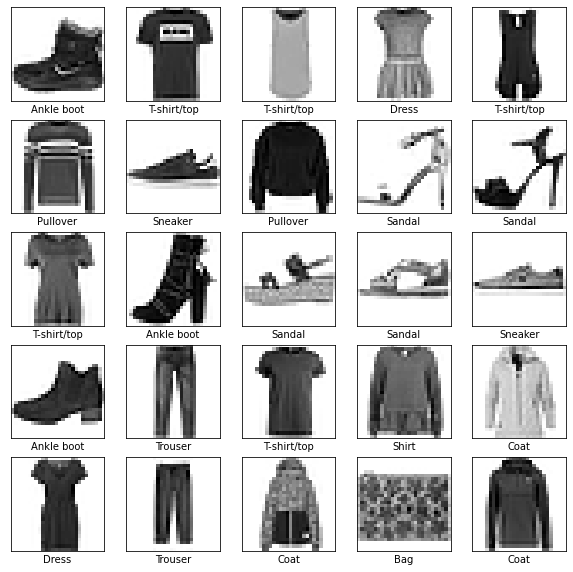

In [ ]:
#code block taken https://www.tensorflow.org/tutorials/keras/classification
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

This shows some samples. This highlights shirts, coats, and pullovers may be difficult to classify. It also shows that the images are not high quality, they are simple 28x28 grayscale images. 

In [ ]:
#expand the dimensions
X_train = np.expand_dims(train_images, -1)
X_test = np.expand_dims(test_images, -1)

In [ ]:
#The traditional models need flattened shapes
train_images_flat = train_images.reshape(60000, 784)
train_images_flat.shape
train_images_frame = pd.DataFrame(train_images_flat)
train_images_frame.shape

(60000, 784)

In [ ]:
test_images_flat = test_images.reshape(10000, 784)
test_images_flat.shape
test_images_frame = pd.DataFrame(test_images_flat)
test_images_frame.shape

(10000, 784)

In [ ]:
#create empty arrays for results
timeToCompute = []
timeToPredict = []
accuracyScore = []

In [ ]:
# Plot confusion matrix
#this code block is taken from a udemy tutorial 
#https://www.udemy.com/course/advanced-computer-vision


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

# Random Forest (Baseline)



In [ ]:
clf = RandomForestClassifier(n_estimators=30,max_depth=15, random_state=0) #instantiate model

time_start = time.perf_counter()
clf.fit(train_images_frame, train_labels) #fit with wrapped timer
fit_time_rf = (time.perf_counter() - time_start)

time_start = time.perf_counter()
predictions = clf.predict(test_images_frame) #predict with wrapped timer
predict_time_rf = (time.perf_counter() - time_start)

ac = accuracy_score(predictions, test_labels) #calculate accuracy
print(ac)
confusion_matrix(predictions, test_labels) #print confusion matrix 

0.8628


array([[845,   2,  11,  21,   2,   0, 165,   0,   0,   0],
       [  0, 949,   0,   3,   0,   0,   1,   0,   0,   0],
       [  9,   5, 772,  12,  95,   0, 131,   0,   4,   0],
       [ 39,  28,   9, 895,  35,   1,  32,   0,   5,   0],
       [  6,   5, 139,  32, 816,   0, 110,   0,   6,   0],
       [  2,   0,   0,   0,   0, 947,   0,   9,   4,   6],
       [ 90,   9,  64,  35,  51,   0, 545,   0,   6,   1],
       [  0,   0,   0,   0,   0,  35,   0, 947,   4,  49],
       [  9,   2,   5,   2,   1,   4,  16,   1, 970,   2],
       [  0,   0,   0,   0,   0,  13,   0,  43,   1, 942]])

In [ ]:
#append results to lists
timeToCompute.append(fit_time_rf)
timeToPredict.append(predict_time_rf)
accuracyScore.append(ac)

# Deep Neural Network

In [ ]:
i = layers.Input(shape = (train_images_flat[0].shape)) #define input layer according to shape
x = layers.Dense(512, activation='relu')(i)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(10, activation='softmax')(x) #final dense layer for final predictions

Epoch 1/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4873 - accuracy: 0.8237 - val_loss: 0.3982 - val_accuracy: 0.8551
Epoch 2/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3670 - accuracy: 0.8659 - val_loss: 0.3798 - val_accuracy: 0.8661
Epoch 3/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3355 - accuracy: 0.8763 - val_loss: 0.3721 - val_accuracy: 0.8579
Epoch 4/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3126 - accuracy: 0.8845 - val_loss: 0.3444 - val_accuracy: 0.8773
Epoch 5/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2937 - accuracy: 0.8914 - val_loss: 0.3584 - val_accuracy: 0.8731
Epoch 6/50
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2815 - accuracy: 0.8957 - val_loss: 0.3666 - val_accuracy: 0.8670
Epoch 7/50
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2685 - accuracy: 0.9007 - val_loss: 0.3456 - val_ac

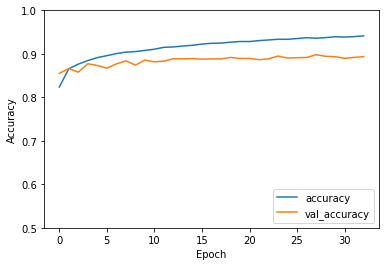

In [ ]:
model_ann = Model(i, x) #build model


#create callbacks for early stopping and restoring best weights
callBack = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', min_delta=0, patience=5, verbose=0,
    mode='auto', baseline=None, restore_best_weights=True
)

model_ann.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])


#fit with time wrappers
time_start = time.perf_counter()
history = model_ann.fit(train_images_flat, train_labels,epochs=50, validation_data=(test_images_flat, test_labels), callbacks=[callBack])
fit_time_ann = (time.perf_counter() - time_start)




plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_ann.evaluate(test_images_flat,  test_labels, verbose=2)

print(test_acc)

In [ ]:
time_start = time.perf_counter()
predictions = model_ann.predict(test_images_flat)
predict_time_ann = (time.perf_counter() - time_start)

Confusion matrix, without normalization
[[864   1  14  34   2   2  77   0   6   0]
 [  3 971   4  15   4   0   2   0   1   0]
 [ 16   0 852  12  67   0  51   0   2   0]
 [ 13   5   7 945  13   0  12   0   5   0]
 [  1   0 105  44 805   0  43   0   2   0]
 [  0   0   0   0   0 968   0  18   1  13]
 [125   0 101  41  54   0 670   0   9   0]
 [  0   0   0   0   0   8   0 976   0  16]
 [  4   0   2   5   3   4   7   1 974   0]
 [  1   0   0   0   0   4   0  40   0 955]]


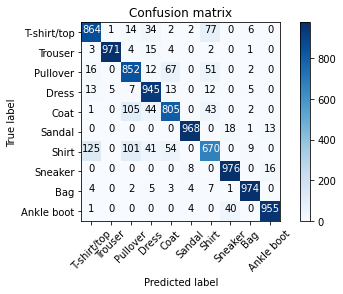

In [ ]:
p_test = model_ann.predict(test_images_flat).argmax(axis=1)
cm = confusion_matrix(test_labels, p_test)
plot_confusion_matrix(cm, class_names)

In [ ]:
timeToCompute.append(fit_time_ann)
timeToPredict.append(predict_time_ann)
accuracyScore.append(test_acc)

In [ ]:
model_ann.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                2570      
Total params: 798,474
Trainable params: 798,474
Non-trainable params: 0
_____________________________________________________

# CNN 1 (0.9236)

1.   3 convulation layers
2.   pooling
3.   2 dense layers

In [ ]:
i = layers.Input(shape = (X_train[0].shape))

x = layers.Conv2D(64, (3,3), activation='relu', strides = (1,1), padding= 'same')(i)
x = layers.Conv2D(64, (3,3), activation='relu', strides = (2,2), padding= 'same')(x)
x = layers.Conv2D(64, (3,3), activation='relu', strides = (1,1), padding= 'same')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.2)(x)

x = layers.Dense(10, activation='softmax')(x)

Epoch 1/50
1875/1875 [==============================] - 41s 21ms/step - loss: 0.3892 - accuracy: 0.8561 - val_loss: 0.2893 - val_accuracy: 0.8936
Epoch 2/50
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2509 - accuracy: 0.9072 - val_loss: 0.2464 - val_accuracy: 0.9092
Epoch 3/50
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2070 - accuracy: 0.9237 - val_loss: 0.2467 - val_accuracy: 0.9132
Epoch 4/50
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1732 - accuracy: 0.9356 - val_loss: 0.2441 - val_accuracy: 0.9123
Epoch 5/50
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1438 - accuracy: 0.9472 - val_loss: 0.2465 - val_accuracy: 0.9218
Epoch 6/50
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1204 - accuracy: 0.9543 - val_loss: 0.2438 - val_accuracy: 0.9223
Epoch 7/50
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1019 - accuracy: 0.9625 - val_loss: 0.2714 -

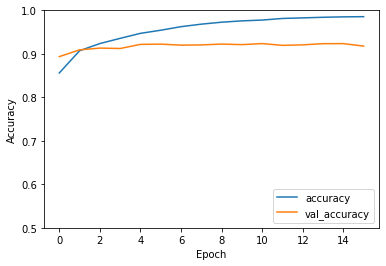

In [ ]:
model_cnn_1 = Model(i, x)

callBack = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', min_delta=0, patience=5, verbose=0,
    mode='auto', baseline=None, restore_best_weights=True
)

model_cnn_1.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])


time_start = time.perf_counter()
history = model_cnn_1.fit(X_train, train_labels ,epochs=50, validation_data=(X_test, test_labels), callbacks=[callBack])
fit_time_cnn = (time.perf_counter() - time_start)


plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_cnn_1.evaluate(X_test,  test_labels, verbose=2)

print(test_acc)

In [ ]:
time_start = time.perf_counter()
predictions = model_cnn_1.predict(X_test)
predict_time_cnn = (time.perf_counter() - time_start)

Confusion matrix, without normalization
[[886   2  21  11   2   0  74   0   4   0]
 [  2 985   1   8   1   0   3   0   0   0]
 [ 19   0 891   8  36   0  46   0   0   0]
 [ 18   1   3 938  20   0  19   0   1   0]
 [  0   0  61  22 882   0  35   0   0   0]
 [  0   0   0   0   0 985   0  10   0   5]
 [104   2  50  26  72   0 740   0   6   0]
 [  0   0   0   0   0   3   0 978   0  19]
 [  1   1   1   2   3   2   2   3 985   0]
 [  0   0   0   0   0   2   1  31   0 966]]


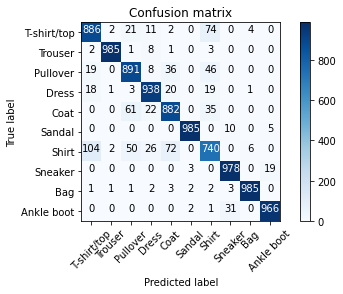

In [ ]:
p_test = model_cnn_1.predict(X_test).argmax(axis=1)
cm = confusion_matrix(test_labels, p_test)
plot_confusion_matrix(cm, class_names)

In [ ]:
timeToCompute.append(fit_time_cnn)
timeToPredict.append(predict_time_cnn)
accuracyScore.append(test_acc)

In [ ]:
model_cnn_1.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               1606

# CNN 2 (0.9301)



1.   4 convultion layers
2.   Batch Normalization
3.   Pooling 
4.   2 Dense layers 
5.   Regularization



In [ ]:
L_2 = regularizers.l2(0.00020)

i = layers.Input(shape = (X_train[0].shape))
x = layers.Conv2D(32, (3,3), strides = (1,1),activation='relu', padding= 'same', kernel_regularizer=L_2)(i)
x = layers.Conv2D(32, (3,3), strides = (1,1),activation='relu', padding= 'same', kernel_regularizer=L_2)(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.2)(x)
x = layers.Conv2D(64, (3,3), strides = (1,1),activation='relu', padding= 'same', kernel_regularizer=L_2)(x)
x = layers.Conv2D(64, (3,3), strides = (1,1),activation='relu', padding= 'same', kernel_regularizer=L_2)(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu', kernel_regularizer=L_2)(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(256, activation='relu', kernel_regularizer=L_2)(x)
x = layers.Dropout(0.2)(x)

x = layers.Dense(10, activation='softmax')(x)

Epoch 1/50
938/938 [==============================] - 66s 69ms/step - loss: 1.1396 - accuracy: 0.6795 - val_loss: 0.8120 - val_accuracy: 0.7938
Epoch 2/50
938/938 [==============================] - 65s 69ms/step - loss: 0.8529 - accuracy: 0.7781 - val_loss: 0.7387 - val_accuracy: 0.8280
Epoch 3/50
938/938 [==============================] - 66s 71ms/step - loss: 0.7677 - accuracy: 0.8100 - val_loss: 0.6914 - val_accuracy: 0.8396
Epoch 4/50
938/938 [==============================] - 67s 71ms/step - loss: 0.7051 - accuracy: 0.8319 - val_loss: 0.6321 - val_accuracy: 0.8629
Epoch 5/50
938/938 [==============================] - 67s 72ms/step - loss: 0.6611 - accuracy: 0.8467 - val_loss: 0.6017 - val_accuracy: 0.8673
Epoch 6/50
938/938 [==============================] - 67s 71ms/step - loss: 0.6241 - accuracy: 0.8553 - val_loss: 0.5764 - val_accuracy: 0.8742
Epoch 7/50
938/938 [==============================] - 66s 71ms/step - loss: 0.5954 - accuracy: 0.8648 - val_loss: 0.5569 - val_accuracy:

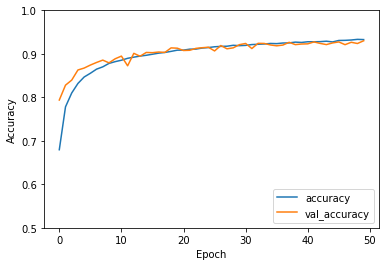

In [ ]:
model_cnn2 = Model(i, x)

callBack = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', min_delta=0, patience=10, verbose=0,
    mode='auto', baseline=None, restore_best_weights=True
)



batch_size = 64
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,vertical_flip=True,horizontal_flip=True) #.15 true false
train_generator = data_generator.flow(X_train, train_labels, batch_size)




optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, decay=1e-6)

model_cnn2.compile(optimizer= optimizer,loss='SparseCategoricalCrossentropy',metrics=['accuracy'])




time_start = time.perf_counter()
history = model_cnn2.fit(train_generator,epochs=50, batch_size = batch_size, validation_data=(X_test, test_labels), callbacks=[callBack])
fit_time_cnn2 = (time.perf_counter() - time_start)




plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_cnn2.evaluate(X_test,  test_labels, verbose=2)

print(test_acc)

In [ ]:
time_start = time.perf_counter()
predictions = model_cnn2.predict(X_test)
predict_time_cnn2 = (time.perf_counter() - time_start)

Confusion matrix, without normalization
[[884   1  11  26   1   0  74   0   3   0]
 [  0 986   0  10   0   0   2   0   2   0]
 [ 18   1 906   8  28   0  38   0   1   0]
 [ 12   5   5 934  18   0  25   0   1   0]
 [  0   1  32  19 909   0  39   0   0   0]
 [  0   0   0   0   0 985   0  13   0   2]
 [ 90   1  52  26  63   0 764   0   4   0]
 [  0   0   0   0   0   3   0 983   0  14]
 [  1   2   0   2   4   1   0   3 987   0]
 [  0   0   0   0   0   5   1  31   0 963]]


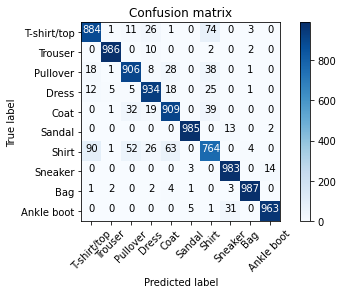

In [ ]:
p_test = model_cnn2.predict(X_test).argmax(axis=1)
cm = confusion_matrix(test_labels, p_test)
plot_confusion_matrix(cm, class_names)

In [ ]:
timeToCompute.append(fit_time_cnn2)
timeToPredict.append(predict_time_cnn2)
accuracyScore.append(test_acc)

In [ ]:
model_cnn2.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_12 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 14, 14, 64)        184

# CNN 3 0.9427

In [ ]:
L_2 = regularizers.l2(0.00030)
i = layers.Input(shape = (X_train[0].shape))



x = layers.Conv2D(64, (3,3), strides = (1,1),activation='relu', padding= 'same', kernel_regularizer=L_2)(i)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(64, (3,3), strides = (1,1),activation='relu', padding= 'same', kernel_regularizer=L_2)(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.2)(x)


x = layers.Conv2D(128, (3,3), strides = (1,1),activation='relu', padding= 'same', kernel_regularizer=L_2)(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(128, (3,3), strides = (1,1),activation='relu', padding= 'same', kernel_regularizer=L_2)(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.3)(x)


x = layers.Flatten()(x)
x = layers.Dense(1024, activation='relu', kernel_regularizer=L_2)(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(512, activation='relu', kernel_regularizer=L_2)(x)
x = layers.Dropout(0.2)(x)

x = layers.Dense(10, activation='softmax')(x)


Epoch 1/75
938/938 [==============================] - 127s 135ms/step - loss: 1.3724 - accuracy: 0.8002 - val_loss: 1.1074 - val_accuracy: 0.8828
Epoch 2/75
938/938 [==============================] - 126s 134ms/step - loss: 1.1052 - accuracy: 0.8748 - val_loss: 1.0159 - val_accuracy: 0.8931
Epoch 3/75
938/938 [==============================] - 126s 134ms/step - loss: 0.9882 - accuracy: 0.8934 - val_loss: 0.9568 - val_accuracy: 0.8944
Epoch 4/75
938/938 [==============================] - 126s 134ms/step - loss: 0.8828 - accuracy: 0.9067 - val_loss: 0.8285 - val_accuracy: 0.9136
Epoch 5/75
938/938 [==============================] - 125s 134ms/step - loss: 0.7932 - accuracy: 0.9139 - val_loss: 0.7691 - val_accuracy: 0.9151
Epoch 6/75
938/938 [==============================] - 127s 135ms/step - loss: 0.7085 - accuracy: 0.9219 - val_loss: 0.6805 - val_accuracy: 0.9236
Epoch 7/75
938/938 [==============================] - 128s 136ms/step - loss: 0.6353 - accuracy: 0.9277 - val_loss: 0.6303 -

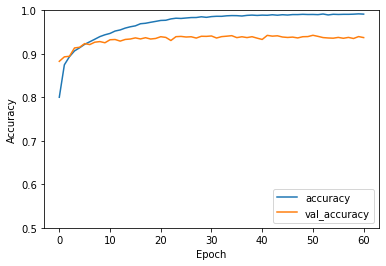

In [ ]:

#9351 on other l2 and 0 DA
model_cnn3 = Model(i, x)

callBack = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', min_delta=0, patience=10, verbose=0,
    mode='auto', baseline=None, restore_best_weights=True
)

# initial_learning_rate = 0.001

# lr_schedule = keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=initial_learning_rate,
#     decay_steps=10000,
#     decay_rate=0.96) #.75

batch_size = 64
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=0,vertical_flip=False,horizontal_flip=False) #.15 true false
train_generator = data_generator.flow(X_train, train_labels, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size



adam = Adam(learning_rate=0.0001, decay=1e-6)
model_cnn3.compile(optimizer= adam,loss='SparseCategoricalCrossentropy',metrics=['accuracy'])




time_start = time.perf_counter()
history = model_cnn3.fit(train_generator,epochs=75, batch_size = batch_size, validation_data=(X_test, test_labels), callbacks=[callBack])
fit_time_cnn3 = (time.perf_counter() - time_start)


plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_cnn3.evaluate(X_test,  test_labels, verbose=2)

print(test_acc)

In [ ]:
time_start = time.perf_counter()
predictions = model_cnn3.predict(X_test)
predict_time_cnn3 = (time.perf_counter() - time_start)

Confusion matrix, without normalization
[[891   1  23   9   2   1  70   0   3   0]
 [  2 988   1   7   1   0   0   0   1   0]
 [  9   0 930   9  31   0  21   0   0   0]
 [ 10   1  10 941  19   0  17   0   2   0]
 [  0   0  21  13 933   0  33   0   0   0]
 [  0   0   0   0   0 986   0  10   0   4]
 [ 78   0  37  21  50   0 808   0   6   0]
 [  0   0   0   0   0   4   0 978   0  18]
 [  2   0   0   1   1   1   0   2 993   0]
 [  0   0   1   0   0   5   0  15   0 979]]


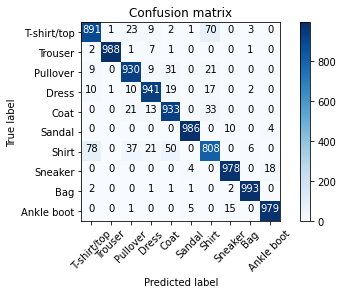

In [ ]:
p_test = model_cnn3.predict(X_test).argmax(axis=1)
cm = confusion_matrix(test_labels, p_test)
plot_confusion_matrix(cm, class_names)

In [ ]:
timeToCompute.append(fit_time_cnn3)
timeToPredict.append(predict_time_cnn3)
accuracyScore.append(test_acc)

In [ ]:
model_cnn3.summary()

Model: "model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization_48 (Batc (None, 28, 28, 64)        256       
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
batch_normalization_49 (Batc (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_64 (Dropout)         (None, 14, 14, 64)        0  

In [ ]:
models = ['RF','DNN', 'CNN_1','CNN_2','CNN_3']
params = ['NA', '798,474','1,814,538','1,805,418','7,213,258']
timeToCompute_mins = [number / 60 for number in timeToCompute]
timeToCompute_mins = [round(num) for num in timeToCompute_mins]
resultFrame = pd.DataFrame(list(zip(models, timeToCompute_mins, timeToPredict, accuracyScore,params))
  ,columns = ['Models', 'Mins_to_fit','predict_time', 'Val_accuracy','# Params'])
resultFrame

,Models,Mins_to_fit,predict_time,Val_accuracy,# Params
0,RF,0,0.138770,0.8628,NA
1,DNN,6,0.624718,0.8980,"798,474"
2,CNN_1,10,1.798134,0.9236,"1,814,538"
3,CNN_2,56,3.011816,0.9301,"1,805,418"
4,CNN_3,128,5.329576,0.9427,"7,213,258"


This notebook shows the implementations and results of 5 different models trained to classify pieces of clothing. It is a famous and standard dataset to evaluate modeling used for computer vision. 

All accuracies presented below are on the validation set. Regarding the neural networks, each model uses a decayed learning rate. As training continues, the learning rate gets smaller and smaller. This helps with accuracy. In addition to this, I use callbacks to restore best weights and stop training early. The number of epochs set are never fully used. If the model's validation accuracy does not improve for 10 epochs it will stop training and restore the best weights. 

### Random Forest 

The random forest serves as a great baseline because it trains in under a minute. The times shown in the table are in minutes and are rounded to whole numbers. Furthermore, the random forest has an accuracy of 86%. This is a pretty amazing result with a ten class problem but it can be improved. 


### Deep Neural Network 

This model is a deep feed forward ANN. It trains in 6 minutes, has an accuracy of 89.8% and has 798,474 trainable parameters. It is an improvement, but it is not the end solution. The data structure that is passed to the model is flattened, this is the same with the random forest. It is a 28x28 image flattened into 784 pixel array. The problem with this is we lose the structure of the image itself. 

### CNN 1 

This is a simple CNN with 3 convolutional layers and dropout. The CNN does not initially breakdown the structure of the image itself. The CNN also includes pooling and dropout. Pooling helps reduce computational overhead and dropout helps with overfitting by randomly turning off neurons. This prevents the model from getting hooked on a single small feature. 

The model trained for 10 minutes, had roughly 1.8 million trainable parameters and 92.36% accuracy. The CNN does much better than the DNN or random forest but it starts to become more computationally expensive. Furthermore, the DNN took .62 seconds to predict 10k samples, this CNN took 1.8 seconds to do the same.


### CNN 2 

This second CNN improves on the previous one. It only has one additional convolutional layer, however, it adds Batch Normalization and regularization. The Batch Normalization helps smooth out gradient issues with deeper networks, and the regularization helps with overfitting. The model trained in 56 minutes, only had around 1.8 million params, and had an accuracy of 93%.

The model also used data augmentation to rotate the images and flip the axes. This gives the model additional training by adding new data, the rotated and flipped images. 

### CNN 3 

This model still only uses 4 convolutional layers but it increases the number of kernels to 64, 64, 128, and 128. The model also uses batch normalization, regularization, pooling, and dropout. The summary of the model can be viewed above to recreate these results. This model trained for 128 minutes or roughly 2 hours, had 7.2 million parameters, and had a validation accuracy of 94.27%. This is a massive improvement from our random forest. It is important to note that the time to predict 10k samples is nearly 6 seconds. 

The model does not use data augmentation. Interestingly, every attempt to use data augmentation resulted in worse classification rates. However, more tuning may have fixed that problem. 


The choice model is the 3rd CNN with the 94.27% accuracy. It is impressive that the DNN can get an accuracy of 90% with training for 6 mins, vs this model training for 2 hours. However, 2 hours of training is not unreasonable, especially for 7 million + params. Furthermore, it takes 5 seconds to predict 10k samples. In some situations this is acceptable and in others not. For this scenario, it is completely reasonable. If it were some sort of model that was used to make predictions on the web and display to a user it may need to be faster. 

Choice model with 94.27% accuracy
Confusion matrix, without normalization
[[891   1  23   9   2   1  70   0   3   0]
 [  2 988   1   7   1   0   0   0   1   0]
 [  9   0 930   9  31   0  21   0   0   0]
 [ 10   1  10 941  19   0  17   0   2   0]
 [  0   0  21  13 933   0  33   0   0   0]
 [  0   0   0   0   0 986   0  10   0   4]
 [ 78   0  37  21  50   0 808   0   6   0]
 [  0   0   0   0   0   4   0 978   0  18]
 [  2   0   0   1   1   1   0   2 993   0]
 [  0   0   1   0   0   5   0  15   0 979]]


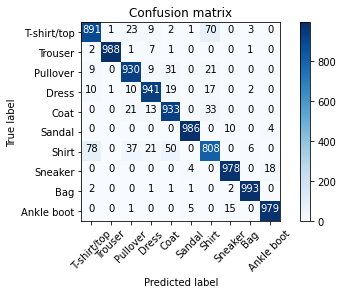

In [ ]:
print('Choice model with 94.27% accuracy')
plot_confusion_matrix(cm, class_names)

This is the confusion matrix for the choice model. As expected, a fashion item like a bag is easy to classify. Nothing else seems to look like a bag. However, the difference between a shirt, coat, pullover, and t-shirt/top is confusing for all models, even this final one. 